In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [15]:
experiment_types = ["lower_x", "lower_y", "mid_x", "mid_y", "upper_x", "upper_y", "upper_y_alt", "draw_square"]
method_types = ["collision_ik", "dawn_ik"]

samples = []
for filename in glob.glob('*.csv'):
  print("Reading file:", filename)
  sample = {}

  for i, experiment_type in enumerate(experiment_types):
    if experiment_type in filename:
      sample["experiment_type"] = experiment_type
      print("Detected experiment type:", experiment_type)
  
  for i, method_type in enumerate(method_types):
    if method_type in filename:
      sample["method_type"] = method_type
      print("Detected method type:", method_type)

  sample["data"] = np.genfromtxt(filename, delimiter=',')

  if "method_type" not in sample or "method_type" not in sample:
    print("!!!!!!!!! Error while parsing file:", filename)
    continue
  samples.append(sample)


Reading file: collision_ik_mid_y.csv
Detected experiment type: mid_y
Detected method type: collision_ik
Reading file: collision_ik_upper_y.csv
Detected experiment type: upper_y
Detected method type: collision_ik
Reading file: collision_ik_mid_x.csv
Detected experiment type: mid_x
Detected method type: collision_ik
Reading file: collision_ik_lower_y.csv
Detected experiment type: lower_y
Detected method type: collision_ik
Reading file: dawn_ik_upper_y_alt.csv
Detected experiment type: upper_y
Detected experiment type: upper_y_alt
Detected method type: dawn_ik
Reading file: collision_ik_draw_square.csv
Detected experiment type: draw_square
Detected method type: collision_ik
Reading file: dawn_ik_draw_square.csv
Detected experiment type: draw_square
Detected method type: dawn_ik
Reading file: dawn_ik_upper_x.csv
Detected experiment type: upper_x
Detected method type: dawn_ik
Reading file: dawn_ik_lower_x.csv
Detected experiment type: lower_x
Detected method type: dawn_ik
Reading file: dawn

In [16]:
def separate_data(data):
    timestamp = data[:,0]
    test_tra = data[:,1:4]
    test_rot = data[:,4:8]
    gt_tra = data[:,8:11]
    gt_rot = data[:,11:145]
    return timestamp, test_tra, test_rot, gt_tra, gt_rot

In [22]:
samples_t = {}
for s in samples:
    e_type = s["experiment_type"]
    m_type = s["method_type"]

    if not e_type in samples_t:
        samples_t[e_type] = {}
        samples_t[e_type][m_type] = s
    else:
        samples_t[e_type][m_type] = s

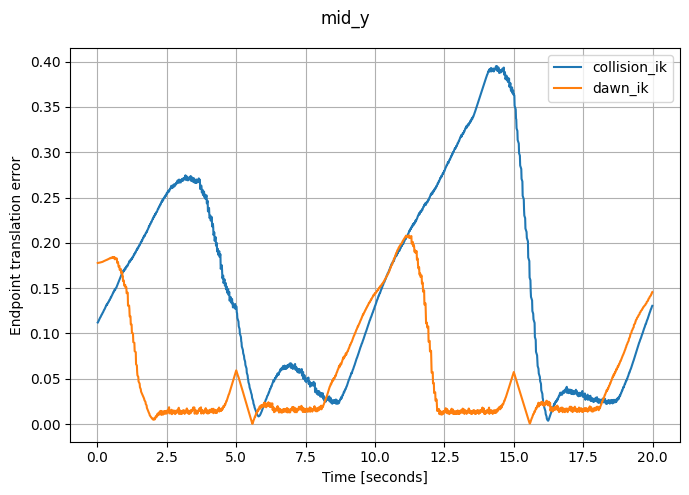

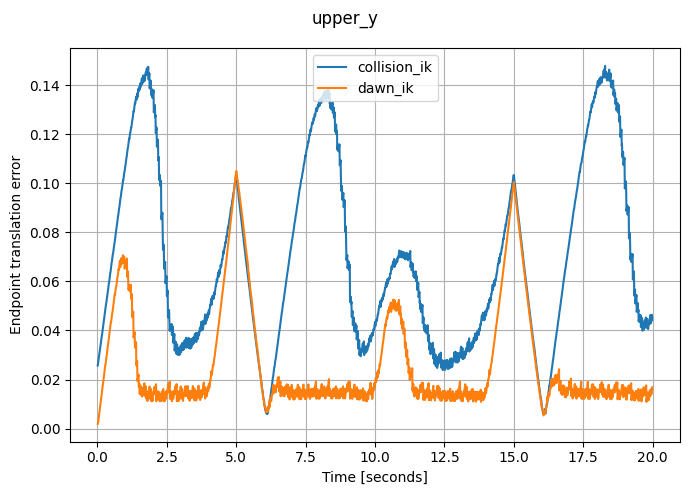

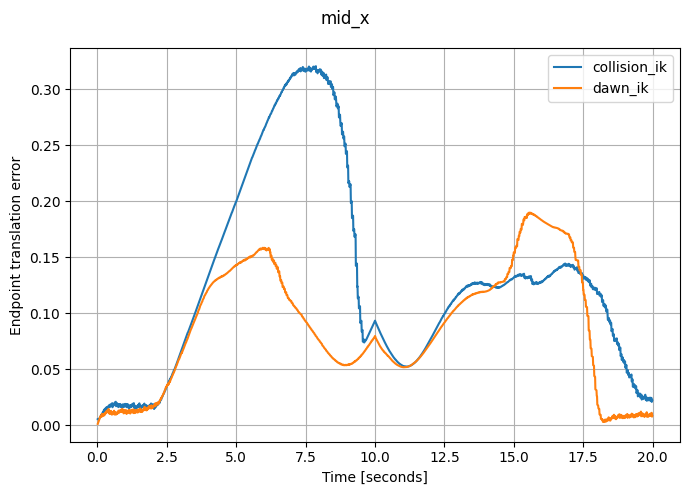

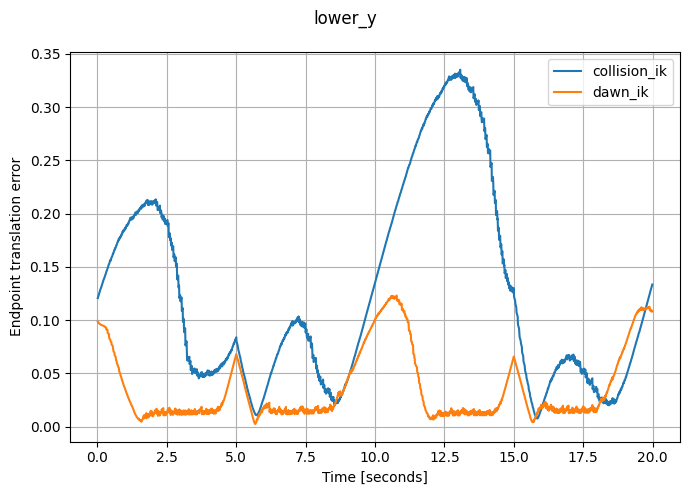

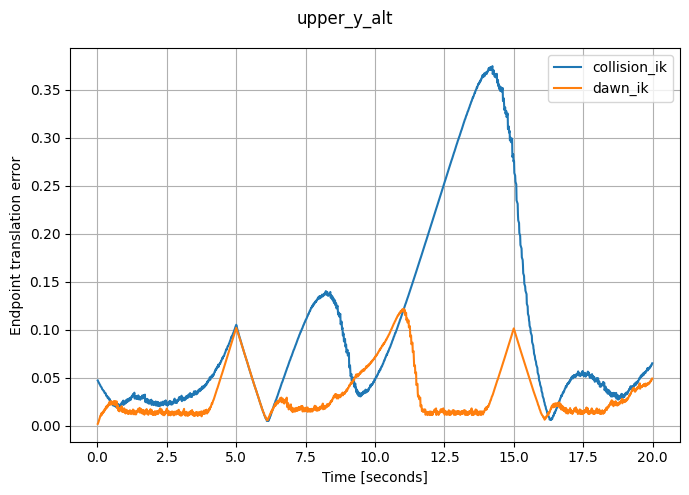

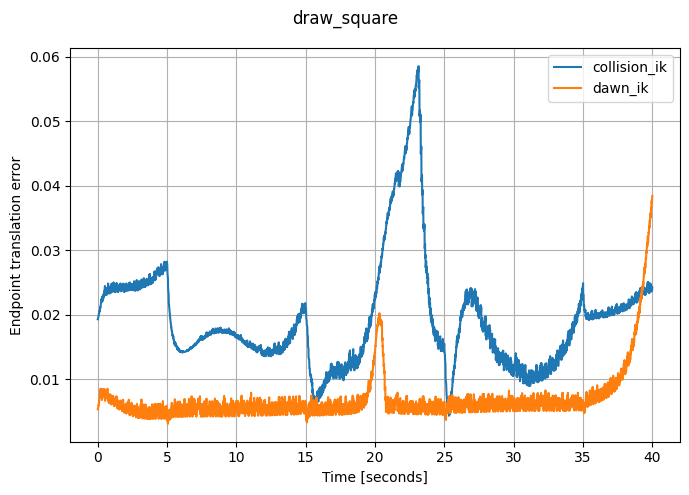

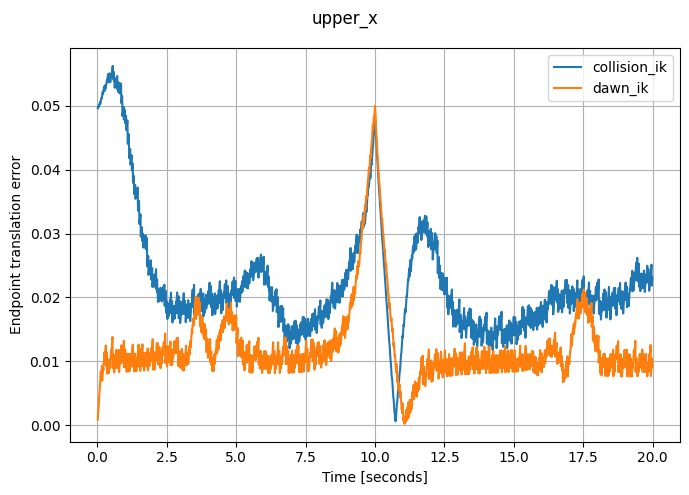

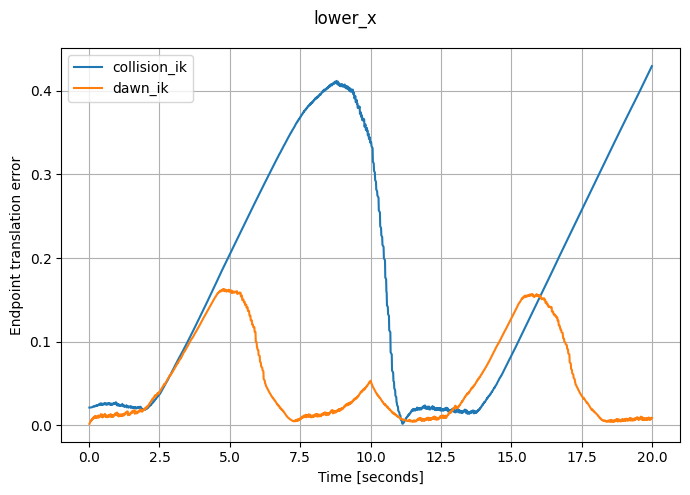

In [46]:
# for m_type in samples_t.keys():
#     fig, axs = plt.subplots(1, len(samples_t[m_type].keys()), sharey=True, figsize=(10,5))
#     for i, e_type in enumerate( sorted(samples_t[m_type].keys()) ):
#         s = samples_t[m_type][e_type]
#         timestamp, test_tra, test_rot, gt_tra, gt_rot = separate_data(s["data"])
#         traj_err = np.linalg.norm(test_tra - gt_tra, axis=1)
#         axs[i].plot(timestamp, traj_err)
#         axs[i].set_title(e_type)
#         axs[i].grid()
#     fig.suptitle(m_type)
#     fig.tight_layout()
#     plt.plot()

for m_type in samples_t.keys():
    fig, ax = plt.subplots(1, figsize=(7,5))
    for i, e_type in enumerate( sorted(samples_t[m_type].keys()) ):
        s = samples_t[m_type][e_type]
        timestamp, test_tra, test_rot, gt_tra, gt_rot = separate_data(s["data"])
        traj_err = np.linalg.norm(test_tra - gt_tra, axis=1)
        ax.plot(timestamp, traj_err, label=e_type)
    ax.set_ylabel("Endpoint translation error")
    ax.set_xlabel("Time [seconds]")
    ax.grid()
    ax.legend()
    fig.suptitle(m_type)
    fig.tight_layout()
    plt.plot()